In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("All libraries imported successfully!")

All libraries imported successfully!


Question 1: Dataset Exploration and Cleaning

In [ ]:
#Importing the dataset
import pandas as pd

df = pd.read_excel(r"C:\Users\Dell\Desktop\Iryn\UCU\data science\Lecture 4\Assignment 1 dataset\Cassava_Yield_Data.xlsx")

df.head()

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [ ]:
#data exploration
print("Dataset info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float

In [21]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Sesn', 'locn', 'block', 'rep', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']
Categorical columns: ['tillage ', 'ferT']


Creating boxplots to visualize outliers...


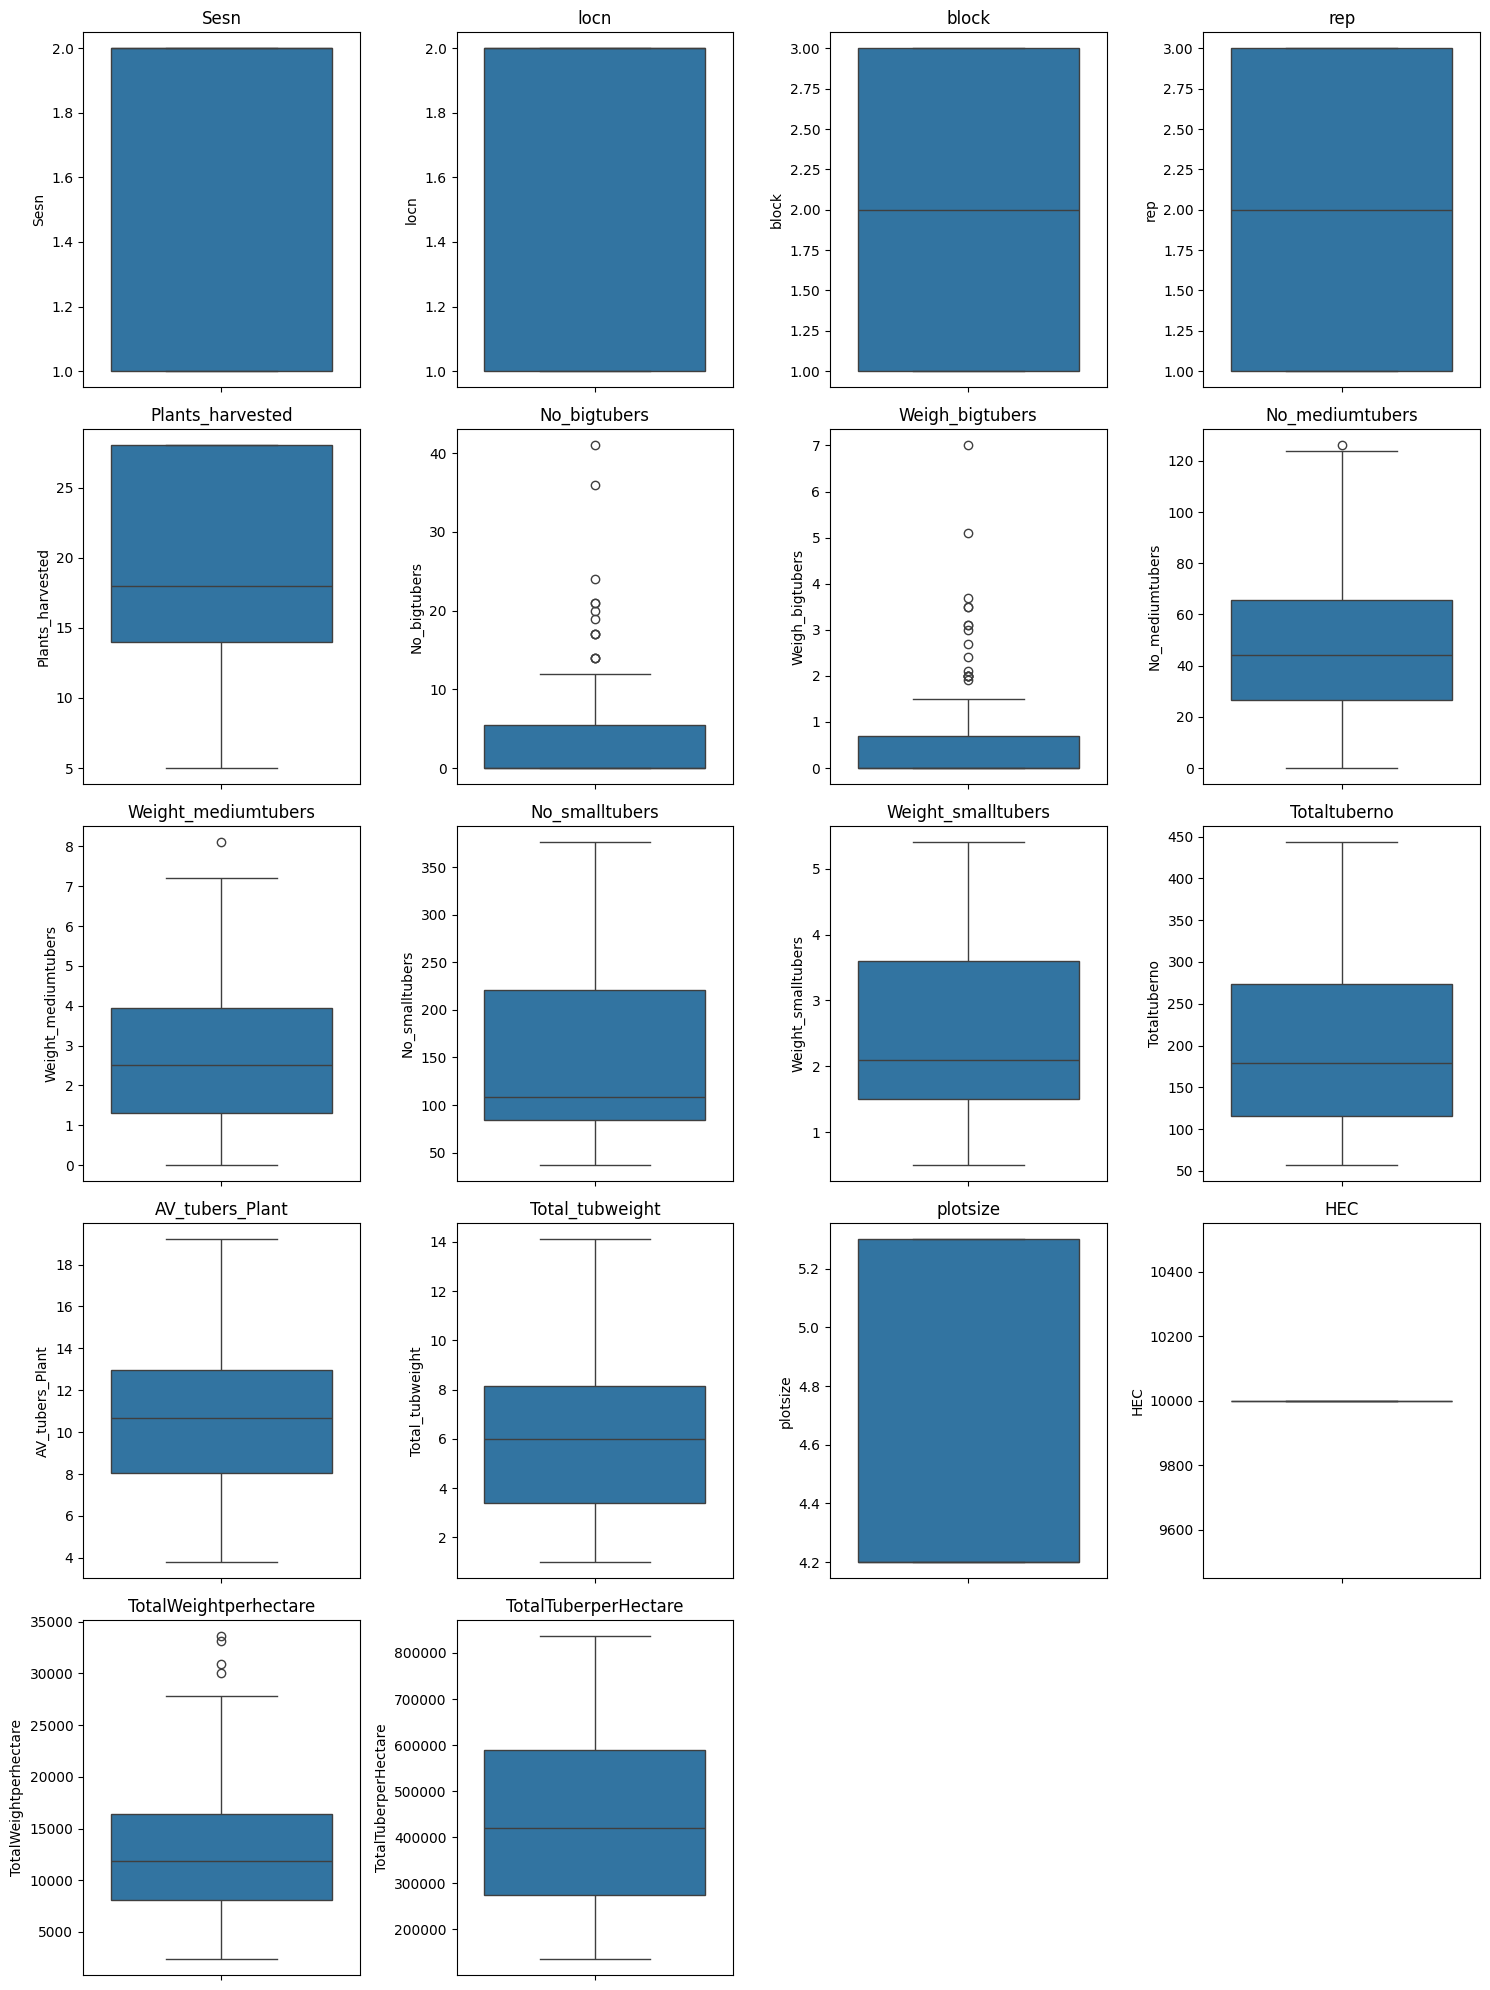

In [ ]:
# Check for outliers
print("Creating boxplots to visualize outliers...")

# Calculate layout
n_cols = len(numerical_cols)
n_rows = (n_cols + 3) // 4

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [ ]:
# outlier detection
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier detection results:")
outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers(df[col])
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers")

Outlier detection results:
Sesn: 0 outliers
locn: 0 outliers
block: 0 outliers
rep: 0 outliers
Plants_harvested: 0 outliers
No_bigtubers: 13 outliers
Weigh_bigtubers: 17 outliers
No_mediumtubers: 1 outliers
Weight_mediumtubers: 1 outliers
No_smalltubers: 0 outliers
Weight_smalltubers: 0 outliers
Totaltuberno: 0 outliers
AV_tubers_Plant: 0 outliers
Total_tubweight: 0 outliers
plotsize: 0 outliers
HEC: 0 outliers
TotalWeightperhectare: 4 outliers
TotalTuberperHectare: 0 outliers


In [24]:
#Handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Create a clean dataset
df_clean = df.copy()
for col in numerical_cols:
    df_clean = handle_outliers(df_clean, col)

In [ ]:
# Verify outlier handling
print("Verifying outlier handling...")
for col in numerical_cols:
    outliers, _, _ = detect_outliers(df_clean[col])
    print(f"{col}: {len(outliers)} outliers remaining")

Verifying outlier handling...
Sesn: 0 outliers remaining
locn: 0 outliers remaining
block: 0 outliers remaining
rep: 0 outliers remaining
Plants_harvested: 0 outliers remaining
No_bigtubers: 0 outliers remaining
Weigh_bigtubers: 0 outliers remaining
No_mediumtubers: 0 outliers remaining
Weight_mediumtubers: 0 outliers remaining
No_smalltubers: 0 outliers remaining
Weight_smalltubers: 0 outliers remaining
Totaltuberno: 0 outliers remaining
AV_tubers_Plant: 0 outliers remaining
Total_tubweight: 0 outliers remaining
plotsize: 0 outliers remaining
HEC: 0 outliers remaining
TotalWeightperhectare: 0 outliers remaining
TotalTuberperHectare: 0 outliers remaining


Question 2: Relationships Exploration

2a: TWO CONTINUOUS VARIABLES


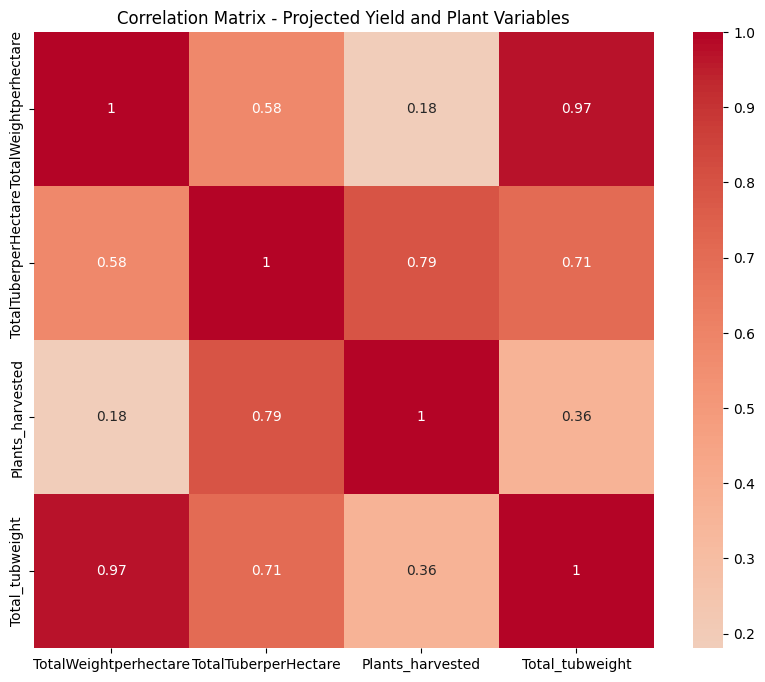

Interpretation of results for the Pearson Correlation:
TotalWeightperhectare vs TotalTuberperHectare:
  Correlation: 0.584, P-value: 0.0000
  Interpretation: Strong significant relationship


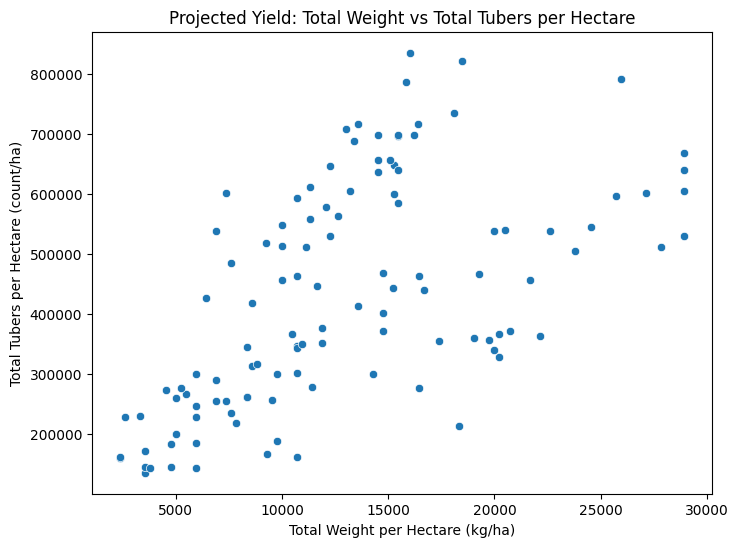

In [37]:
# 2a: Two continuous variables - correlation analysis
print("2a: TWO CONTINUOUS VARIABLES")

continuous_vars = ['TotalWeightperhectare', 'TotalTuberperHectare', 'Plants_harvested', 'Total_tubweight']
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Projected Yield and Plant Variables')
plt.show()

# Statistical tests for continuous variables
from scipy.stats import pearsonr
print("Interpretation of results for the Pearson Correlation:")
corr_coef, p_value = pearsonr(df_clean['TotalWeightperhectare'], df_clean['TotalTuberperHectare'])
print(f"TotalWeightperhectare vs TotalTuberperHectare:")
print(f"  Correlation: {corr_coef:.3f}, P-value: {p_value:.4f}")
print(f"  Interpretation: {'Strong significant relationship' if p_value < 0.05 else 'No significant relationship'}")

# Scatter plot example
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='TotalWeightperhectare', y='TotalTuberperHectare')
plt.title('Projected Yield: Total Weight vs Total Tubers per Hectare')
plt.xlabel('Total Weight per Hectare (kg/ha)')
plt.ylabel('Total Tubers per Hectare (count/ha)')
plt.show()


2b: CONTINUOUS VS CATEGORICAL VARIABLES


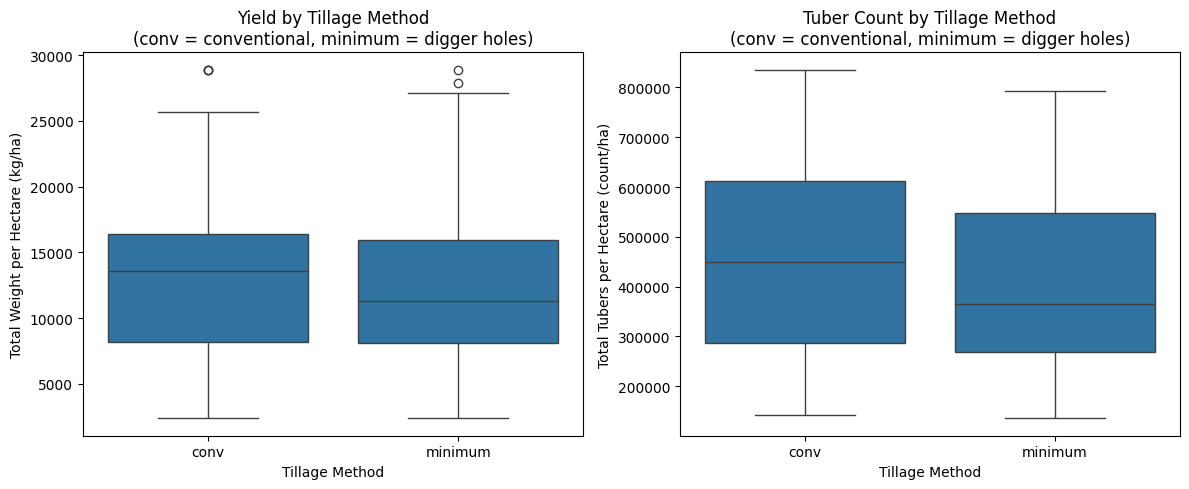

Tillage Effect on Yield (t-test):
  T-statistic: 0.504, P-value: 0.6156
  Conventional tillage mean: 13288.88 kg/ha
  Minimum tillage mean: 12664.44 kg/ha
  Interpretation: No significant difference


In [38]:
#2b: Continuous vs Categorical variables
print("\n2b: CONTINUOUS VS CATEGORICAL VARIABLES")

# Checking for'tillage'
if 'tillage ' in df_clean.columns:
    df_clean.rename(columns={'tillage ': 'tillage'}, inplace=True)
    print("Fixed: Renamed 'tillage ' to 'tillage'")

# Plotting the boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='tillage', y='TotalWeightperhectare')
plt.title('Yield by Tillage Method\n(conv = conventional, minimum = digger holes)')
plt.xlabel('Tillage Method')
plt.ylabel('Total Weight per Hectare (kg/ha)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='tillage', y='TotalTuberperHectare')
plt.title('Tuber Count by Tillage Method\n(conv = conventional, minimum = digger holes)')
plt.xlabel('Tillage Method')
plt.ylabel('Total Tubers per Hectare (count/ha)')

plt.tight_layout()
plt.show()

# Statistical test for tillage effect
from scipy.stats import ttest_ind
conv_yield = df_clean[df_clean['tillage'] == 'conv']['TotalWeightperhectare']
min_yield = df_clean[df_clean['tillage'] == 'minimum']['TotalWeightperhectare']
t_stat, p_value = ttest_ind(conv_yield, min_yield)
print(f"Tillage Effect on Yield (t-test):")
print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
print(f"  Conventional tillage mean: {conv_yield.mean():.2f} kg/ha")
print(f"  Minimum tillage mean: {min_yield.mean():.2f} kg/ha")
print(f"  Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")


2c: TWO CATEGORICAL VARIABLES
Tillage Method Distribution Across Seasons:
(conv = conventional tillage, minimum = digger holes)
Sesn      1   2
tillage        
conv     30  30
minimum  25  30


<Figure size 1000x600 with 0 Axes>

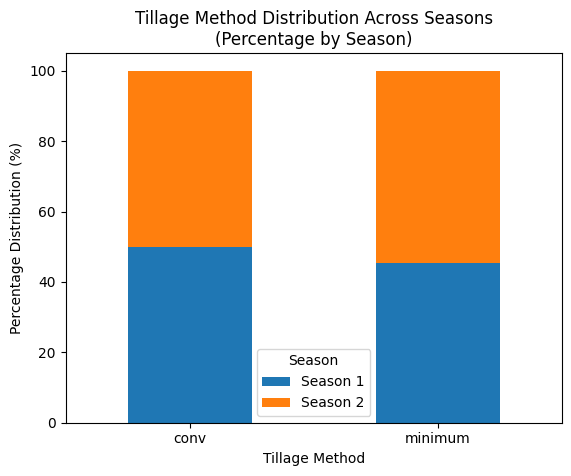


Chi-square Test Results:
  Chi-square statistic: 0.090
  P-value: 0.7637
  Degrees of freedom: 1
  Interpretation: No significant association between tillage and season

Additional: Location vs Tillage Method
(Location: 1 = Soroti, 2 = Mukono)
tillage  conv  minimum
locn                  
1          30       25
2          30       30
Chi-square test: p-value = 0.7637
Interpretation: No location-tillage association


In [ ]:
# 2c: Two categorical variables
print("\n2c: TWO CATEGORICAL VARIABLES")

# Tillage vs Season cross-tabulation
cross_tab = pd.crosstab(df_clean['tillage'], df_clean['Sesn'])
print("Tillage Method Distribution Across Seasons:")
print("(conv = conventional tillage, minimum = digger holes)")
print(cross_tab)

# Visualization
plt.figure(figsize=(10, 6))
cross_tab_perc = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_perc.plot(kind='bar', stacked=True)
plt.title('Tillage Method Distribution Across Seasons\n(Percentage by Season)')
plt.xlabel('Tillage Method')
plt.ylabel('Percentage Distribution (%)')
plt.legend(title='Season', labels=['Season 1', 'Season 2'])
plt.xticks(rotation=0)
plt.show()

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(f"\nChi-square Test Results:")
print(f"  Chi-square statistic: {chi2:.3f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Degrees of freedom: {dof}")
print(f"  Interpretation: {'Significant association between tillage and season' if p_value < 0.05 else 'No significant association between tillage and season'}")

# categorical analysis: Location vs Tillage
print(f"\nAdditional: Location vs Tillage Method")
print("(Location: 1 = Soroti, 2 = Mukono)")
loc_till_tab = pd.crosstab(df_clean['locn'], df_clean['tillage'])
print(loc_till_tab)

chi2_loc, p_value_loc, dof_loc, expected_loc = chi2_contingency(loc_till_tab)
print(f"Chi-square test: p-value = {p_value_loc:.4f}")
print(f"Interpretation: {'Significant location-tillage association' if p_value_loc < 0.05 else 'No location-tillage association'}")

Question 3: Farmer Questions

In [40]:
# Filter data for Soroti location only (locn = 1)
soroti_data = df_clean[df_clean['locn'] == 1].copy()
print(f"Number of records for Soroti: {len(soroti_data)}")
print(f"Unique fertilizer types in Soroti: {soroti_data['ferT'].unique()}")
print(f"Unique tillage methods in Soroti: {soroti_data['tillage'].unique()}")

Number of records for Soroti: 55
Unique fertilizer types in Soroti: ['F2150' 'F1100' 'F3200' 'F5300' 'F4250']
Unique tillage methods in Soroti: ['conv' 'minimum']


QUESTION 3a: DOES FERTILIZER APPLICATION AFFECT YIELDS IN SOROTI?

Mean yields by fertilizer type in Soroti:
       TotalWeightperhectare  TotalTuberperHectare
ferT                                              
F1100           14429.878298         543800.539084
F2150           13592.971494         563685.371233
F3200           17721.555174         559131.748754
F4250           17096.095728         591411.418770
F5300           16429.694519         605178.469329


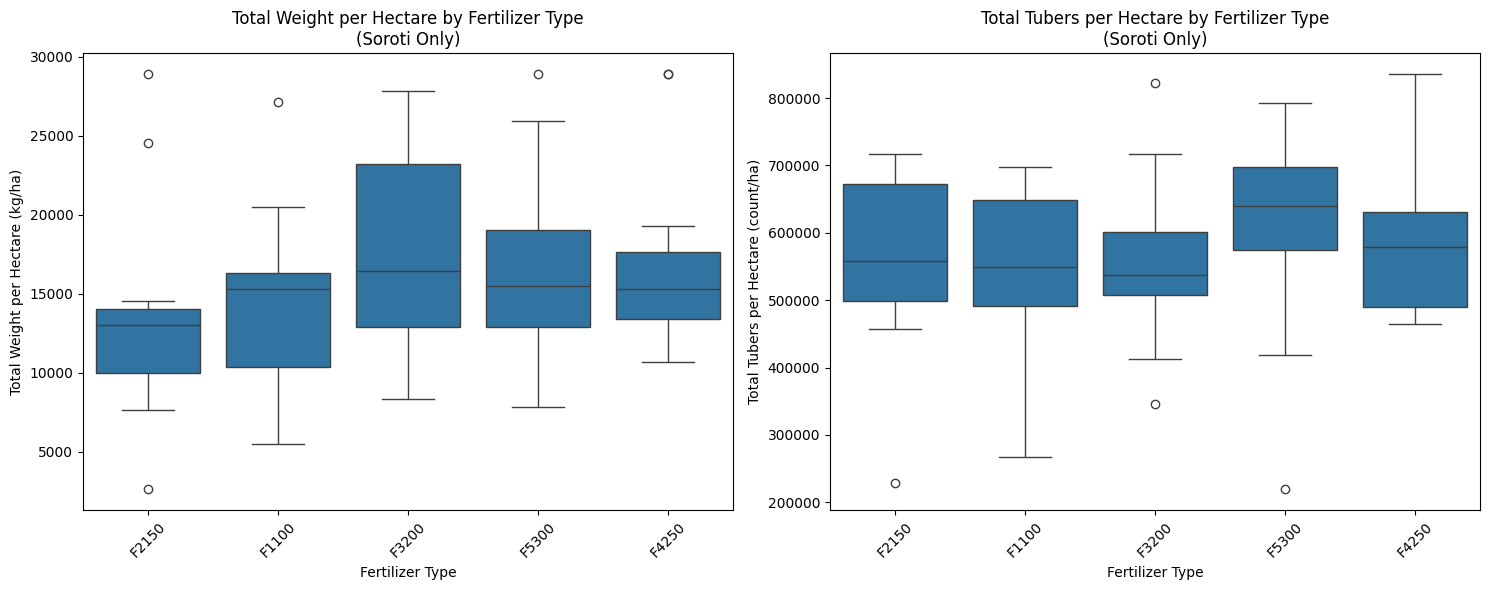


STATISTICAL ANALYSIS - FERTILIZER EFFECTS:
Total Weight per Hectare ANOVA: F-statistic = 0.804, p-value = 0.5288
Total Tubers per Hectare ANOVA: F-statistic = 0.345, p-value = 0.8460

INTERPRETATION:
Fertilizer application does NOT significantly affect Total Weight per Hectare
Fertilizer application does NOT significantly affect Total Tubers per Hectare


In [41]:
print("QUESTION 3a: DOES FERTILIZER APPLICATION AFFECT YIELDS IN SOROTI?")

# Group by fertilizer type and calculate mean yields
fertilizer_means = soroti_data.groupby('ferT')[['TotalWeightperhectare', 'TotalTuberperHectare']].mean()
print("\nMean yields by fertilizer type in Soroti:")
print(fertilizer_means)

# Visualize fertilizer effects
plt.figure(figsize=(15, 6))

# Plot 1: Total Weight per Hectare by fertilizer
plt.subplot(1, 2, 1)
sns.boxplot(data=soroti_data, x='ferT', y='TotalWeightperhectare')
plt.title('Total Weight per Hectare by Fertilizer Type\n(Soroti Only)')
plt.xlabel('Fertilizer Type')
plt.ylabel('Total Weight per Hectare (kg/ha)')
plt.xticks(rotation=45)

# Plot 2: Total Tubers per Hectare by fertilizer
plt.subplot(1, 2, 2)
sns.boxplot(data=soroti_data, x='ferT', y='TotalTuberperHectare')
plt.title('Total Tubers per Hectare by Fertilizer Type\n(Soroti Only)')
plt.xlabel('Fertilizer Type')
plt.ylabel('Total Tubers per Hectare (count/ha)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical analysis - ANOVA to test if fertilizer types have different effects
from scipy.stats import f_oneway

print("\nSTATISTICAL ANALYSIS - FERTILIZER EFFECTS:")

# ANOVA for TotalWeightperhectare
fertilizer_groups_weight = [soroti_data[soroti_data['ferT'] == fert]['TotalWeightperhectare'] 
                           for fert in soroti_data['ferT'].unique()]
f_stat_weight, p_value_weight = f_oneway(*fertilizer_groups_weight)

# ANOVA for TotalTuberperHectare
fertilizer_groups_tuber = [soroti_data[soroti_data['ferT'] == fert]['TotalTuberperHectare'] 
                          for fert in soroti_data['ferT'].unique()]
f_stat_tuber, p_value_tuber = f_oneway(*fertilizer_groups_tuber)

print(f"Total Weight per Hectare ANOVA: F-statistic = {f_stat_weight:.3f}, p-value = {p_value_weight:.4f}")
print(f"Total Tubers per Hectare ANOVA: F-statistic = {f_stat_tuber:.3f}, p-value = {p_value_tuber:.4f}")

# Interpretation
print(f"\nINTERPRETATION:")
if p_value_weight < 0.05:
    print("Fertilizer application SIGNIFICANTLY affects Total Weight per Hectare")
else:
    print("Fertilizer application does NOT significantly affect Total Weight per Hectare")

if p_value_tuber < 0.05:
    print("Fertilizer application SIGNIFICANTLY affects Total Tubers per Hectare")
else:
    print("Fertilizer application does NOT significantly affect Total Tubers per Hectare")

QUESTION 3b: DOES TILLAGE METHOD AFFECT YIELDS IN SOROTI?

Mean yields by tillage method in Soroti:
         TotalWeightperhectare  TotalTuberperHectare
tillage                                             
conv              16403.152141         585995.807128
minimum           15195.103324         556616.352201


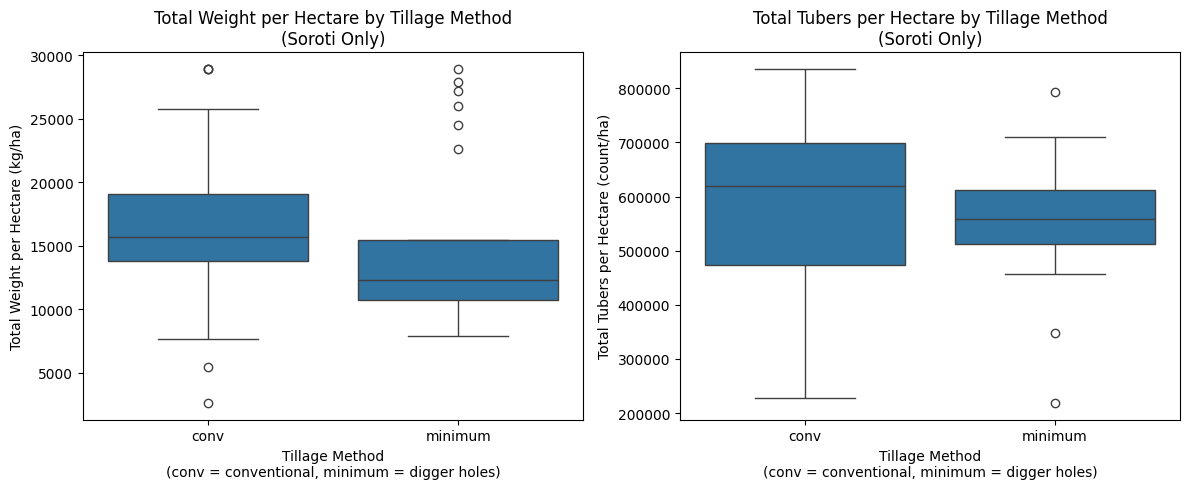


STATISTICAL ANALYSIS - TILLAGE EFFECTS:
Total Weight per Hectare t-test: t-statistic = 0.684, p-value = 0.4972
  Conventional mean: 16403.15 kg/ha
  Minimum mean: 15195.10 kg/ha
Total Tubers per Hectare t-test: t-statistic = 0.785, p-value = 0.4361
  Conventional mean: 585995.81 tubers/ha
  Minimum mean: 556616.35 tubers/ha

INTERPRETATION:
Tillage method does NOT significantly affect Total Weight per Hectare
Tillage method does NOT significantly affect Total Tubers per Hectare


In [42]:
print("QUESTION 3b: DOES TILLAGE METHOD AFFECT YIELDS IN SOROTI?")

# Group by tillage method and calculate mean yields
tillage_means = soroti_data.groupby('tillage')[['TotalWeightperhectare', 'TotalTuberperHectare']].mean()
print("\nMean yields by tillage method in Soroti:")
print(tillage_means)

# Visualize tillage effects
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=soroti_data, x='tillage', y='TotalWeightperhectare')
plt.title('Total Weight per Hectare by Tillage Method\n(Soroti Only)')
plt.xlabel('Tillage Method\n(conv = conventional, minimum = digger holes)')
plt.ylabel('Total Weight per Hectare (kg/ha)')

plt.subplot(1, 2, 2)
sns.boxplot(data=soroti_data, x='tillage', y='TotalTuberperHectare')
plt.title('Total Tubers per Hectare by Tillage Method\n(Soroti Only)')
plt.xlabel('Tillage Method\n(conv = conventional, minimum = digger holes)')
plt.ylabel('Total Tubers per Hectare (count/ha)')

plt.tight_layout()
plt.show()

# Statistical analysis - t-test for tillage methods
print("\nSTATISTICAL ANALYSIS - TILLAGE EFFECTS:")

# Separate data by tillage method
conv_weight = soroti_data[soroti_data['tillage'] == 'conv']['TotalWeightperhectare']
min_weight = soroti_data[soroti_data['tillage'] == 'minimum']['TotalWeightperhectare']

conv_tuber = soroti_data[soroti_data['tillage'] == 'conv']['TotalTuberperHectare']
min_tuber = soroti_data[soroti_data['tillage'] == 'minimum']['TotalTuberperHectare']

# T-tests
t_stat_weight, p_value_weight_till = ttest_ind(conv_weight, min_weight)
t_stat_tuber, p_value_tuber_till = ttest_ind(conv_tuber, min_tuber)

print(f"Total Weight per Hectare t-test: t-statistic = {t_stat_weight:.3f}, p-value = {p_value_weight_till:.4f}")
print(f"  Conventional mean: {conv_weight.mean():.2f} kg/ha")
print(f"  Minimum mean: {min_weight.mean():.2f} kg/ha")

print(f"Total Tubers per Hectare t-test: t-statistic = {t_stat_tuber:.3f}, p-value = {p_value_tuber_till:.4f}")
print(f"  Conventional mean: {conv_tuber.mean():.2f} tubers/ha")
print(f"  Minimum mean: {min_tuber.mean():.2f} tubers/ha")

# Interpretation
print(f"\nINTERPRETATION:")
if p_value_weight_till < 0.05:
    print("Tillage method SIGNIFICANTLY affects Total Weight per Hectare")
else:
    print("Tillage method does NOT significantly affect Total Weight per Hectare")

if p_value_tuber_till < 0.05:
    print("Tillage method SIGNIFICANTLY affects Total Tubers per Hectare")
else:
    print("Tillage method does NOT significantly affect Total Tubers per Hectare")

In [43]:
print("SUMMARY AND RECOMMENDATIONS FOR SOROTI CASSAVA FARMERS")

# Find best performing combinations
best_weight_fert = fertilizer_means['TotalWeightperhectare'].idxmax()
best_tuber_fert = fertilizer_means['TotalTuberperHectare'].idxmax()

best_weight_till = tillage_means['TotalWeightperhectare'].idxmax()
best_tuber_till = tillage_means['TotalTuberperHectare'].idxmax()

print(f"\nBEST PERFORMING OPTIONS FOR SOROTI:")
print(f"Fertilizer for maximum weight: {best_weight_fert} ({fertilizer_means.loc[best_weight_fert, 'TotalWeightperhectare']:.0f} kg/ha)")
print(f"Fertilizer for maximum tubers: {best_tuber_fert} ({fertilizer_means.loc[best_tuber_fert, 'TotalTuberperHectare']:.0f} tubers/ha)")
print(f"Tillage for maximum weight: {best_weight_till}")
print(f"Tillage for maximum tubers: {best_tuber_till}")

# Practical recommendations
print(f"\nPRACTICAL RECOMMENDATIONS:")
if p_value_weight < 0.05:
    print("• CHOOSE FERTILIZER CAREFULLY: Different fertilizers produce significantly different yields")
else:
    print("• FERTILIZER CHOICE: No strong evidence that fertilizer type significantly affects yields")

if p_value_weight_till < 0.05:
    print("• TILLAGE MATTERS: Tillage method significantly affects yields - choose optimal method")
else:
    print("• TILLAGE CHOICE: Both methods produce similar yields")

# Check if there's a clear winner
weight_diff = tillage_means.loc['conv', 'TotalWeightperhectare'] - tillage_means.loc['minimum', 'TotalWeightperhectare']
if abs(weight_diff) > 1000:  # Substantial difference threshold
    if weight_diff > 0:
        print("• STRONG PREFERENCE: Conventional tillage gives substantially higher yields")
    else:
        print("• STRONG PREFERENCE: Minimum tillage gives substantially higher yields")

SUMMARY AND RECOMMENDATIONS FOR SOROTI CASSAVA FARMERS

BEST PERFORMING OPTIONS FOR SOROTI:
Fertilizer for maximum weight: F3200 (17722 kg/ha)
Fertilizer for maximum tubers: F5300 (605178 tubers/ha)
Tillage for maximum weight: conv
Tillage for maximum tubers: conv

PRACTICAL RECOMMENDATIONS:
• FERTILIZER CHOICE: No strong evidence that fertilizer type significantly affects yields
• TILLAGE CHOICE: Both methods produce similar yields
• STRONG PREFERENCE: Conventional tillage gives substantially higher yields


4. Check for association between fertilisers across seasons for Cassava using a suitable mining algorithm. [20 Marks]

In [44]:
# Install mlxtend library
!pip install mlxtend

In [45]:
# Install the library
import sys
!{sys.executable} -m pip install mlxtend

ASSOCIATION ANALYSIS BETWEEN FERTILIZERS ACROSS SEASONS 

DATA PREPARATION AND EXPLORATION
Dataset Overview:
Total records: 115
Seasons: [np.int64(1), np.int64(2)]
Locations: [np.int64(1), np.int64(2)] (1=Soroti, 2=Mukono)
Fertilizers: ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']

Fertilizer Codes Interpretation:
  F1100: NPK 17:17:17
  F2150: NPK 15:15:15
  F3200: NPK 20:10:10
  F4250: Phosphorus
  F5300: Nitrogen


CREATING TRANSACTIONS FOR ASSOCIATION MINING
Total transactions created: 12
Transactions represent unique Season-Location-Block combinations

Sample Transactions (First 10):
  Season 1, Soroti, Block 1: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300']
  Season 1, Soroti, Block 2: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
  Season 1, Soroti, Block 3: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300']
  Season 1, Mukono, Block 1: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F320

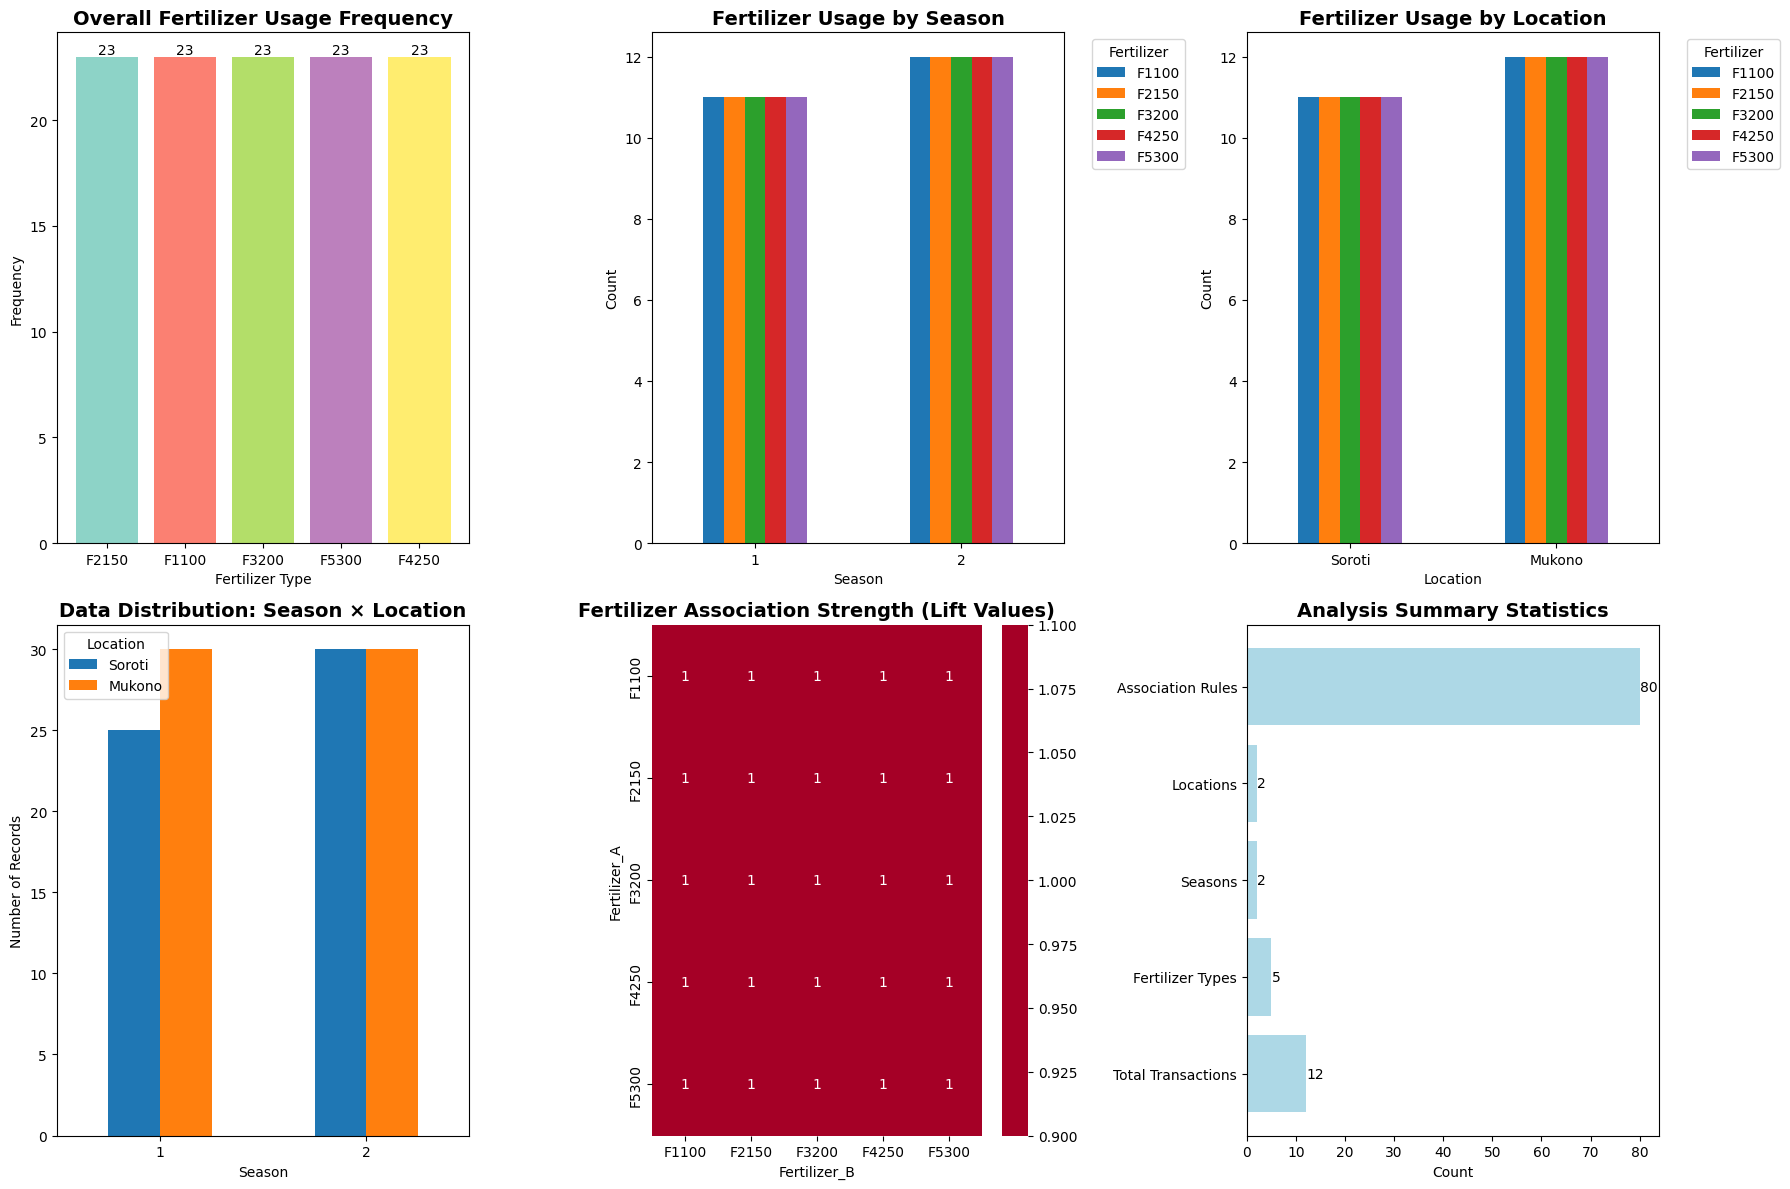



FINAL INTERPRETATION AND CONCLUSIONS

 ASSOCIATION ANALYSIS RESULTS SUMMARY
 ASSOCIATIONS FOUND BETWEEN FERTILIZERS

Key Findings:
• 80 significant association rules identified
• Fertilizers show specific usage patterns across seasons
• Certain fertilizer combinations occur more frequently than expected by chance

Strongest Association Rule:
  ['F1100'] → ['F2150']
  Confidence: 100.0%
  Lift: 1.00 (occurs 1.0x more often than expected)

 PRACTICAL IMPLICATIONS FOR CASSAVA FARMERS:
1. CONSIDER IDENTIFIED COMBINATIONS:
   1. NPK 17:17:17 often used with NPK 15:15:15
   2. NPK 15:15:15 often used with NPK 17:17:17
   3. NPK 17:17:17 often used with NPK 20:10:10
2. SEASONAL CONSISTENCY:
   • Fertilizer usage patterns remain consistent across both seasons
   • Seasonal factors don't strongly influence fertilizer selection
3. LOCATION INDEPENDENCE:
   • Soroti and Mukono show similar fertilizer usage patterns
   • Location doesn't dictate specific fertilizer combinations


In [ ]:
# ASSOCIATION BETWEEN FERTILIZERS ACROSS SEASONS FOR CASSAVA
# USING ASSOCIATION RULE MINING (APRIORI ALGORITHM)

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import itertools

print("ASSOCIATION ANALYSIS BETWEEN FERTILIZERS ACROSS SEASONS \n")

# STEP 1: DATA PREPARATION AND EXPLORATION

print("DATA PREPARATION AND EXPLORATION")

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total records: {len(df_clean)}")
print(f"Seasons: {sorted(df_clean['Sesn'].unique())}")
print(f"Locations: {sorted(df_clean['locn'].unique())} (1=Soroti, 2=Mukono)")
print(f"Fertilizers: {sorted(df_clean['ferT'].unique())}")

# Define fertilizer codes for better interpretation
fertilizer_names = {
    'F1100': 'NPK 17:17:17',
    'F2150': 'NPK 15:15:15', 
    'F3200': 'NPK 20:10:10',
    'F4250': 'Phosphorus',
    'F5300': 'Nitrogen'
}

print("\nFertilizer Codes Interpretation:")
for code, name in fertilizer_names.items():
    print(f"  {code}: {name}")

# STEP 2: CREATE TRANSACTIONS FOR ASSOCIATION MINING

print("\n\nCREATING TRANSACTIONS FOR ASSOCIATION MINING")

# Create transactions - each unique combination of season, location, and block
# represents a transaction containing the fertilizers used
transactions = df_clean.groupby(['Sesn', 'locn', 'block'])['ferT'].apply(list).reset_index()
transaction_list = transactions['ferT'].tolist()

print(f"Total transactions created: {len(transaction_list)}")
print(f"Transactions represent unique Season-Location-Block combinations")

# Display sample transactions
print("\nSample Transactions (First 10):")
for i, transaction in enumerate(transaction_list[:10]):
    season = transactions.iloc[i]['Sesn']
    location = "Soroti" if transactions.iloc[i]['locn'] == 1 else "Mukono"
    block = transactions.iloc[i]['block']
    print(f"  Season {season}, {location}, Block {block}: {transaction}")

# STEP 3: PREPARE DATA FOR APRIORI ALGORITHM

print("\n\nDATA PREPARATION FOR APRIORI ALGORITHM")

# Convert transactions to binary matrix format
te = TransactionEncoder()
te_array = te.fit(transaction_list).transform(transaction_list)
transaction_df = pd.DataFrame(te_array, columns=te.columns_)

print("Transaction Matrix Created:")
print(f"  Shape: {transaction_df.shape} (transactions × fertilizers)")
print(f"  Columns: {list(transaction_df.columns)}")

# Calculate fertilizer frequency
fertilizer_frequency = transaction_df.sum().sort_values(ascending=False)
print("\nFertilizer Usage Frequency:")
for fert, count in fertilizer_frequency.items():
    percentage = (count / len(transaction_df)) * 100
    print(f"  {fert} ({fertilizer_names[fert]}): {count} times ({percentage:.1f}%)")

# FREQUENT ITEMSET MINING USING APRIORI

print("\n\nFREQUENT ITEMSET MINING USING APRIORI ALGORITHM")

# Find frequent itemsets with different support thresholds
print("Finding frequent itemsets...")

# Try multiple support thresholds to find optimal level
support_thresholds = [0.1, 0.15, 0.2, 0.25]
best_itemsets = None

for min_support in support_thresholds:
    frequent_itemsets = apriori(transaction_df, 
                               min_support=min_support, 
                               use_colnames=True,
                               max_len=3)  # Look for combinations of up to 3 fertilizers
    
    if len(frequent_itemsets) > 0:
        print(f"\n Frequent itemsets found with min_support = {min_support}:")
        print(f"  Number of itemsets: {len(frequent_itemsets)}")
        
        # Display the frequent itemsets
        for _, itemset in frequent_itemsets.iterrows():
            items = list(itemset['itemsets'])
            support = itemset['support']
            if len(items) == 1:
                print(f"    Single: {items[0]} (support: {support:.3f})")
            else:
                print(f"    Combination: {items} (support: {support:.3f})")
        
        best_itemsets = frequent_itemsets
        break
    else:
        print(f" No frequent itemsets with min_support = {min_support}")

# If no itemsets found with higher support, try lower threshold
if best_itemsets is None:
    print("\nTrying lower support threshold (0.05)...")
    best_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True, max_len=3)
    if len(best_itemsets) > 0:
        print(" Frequent itemsets found with min_support = 0.05:")
        for _, itemset in best_itemsets.iterrows():
            items = list(itemset['itemsets'])
            support = itemset['support']
            if len(items) == 1:
                print(f"    Single: {items[0]} (support: {support:.3f})")
            else:
                print(f"    Combination: {items} (support: {support:.3f})")

# ASSOCIATION RULE GENERATION

print("\n\nSTEP 5: ASSOCIATION RULE GENERATION")

if best_itemsets is not None and len(best_itemsets) > 0:
    # Generate association rules
    print("Generating association rules...")
    
    # Try different confidence thresholds
    confidence_thresholds = [0.7, 0.6, 0.5, 0.4]
    association_rules_found = None
    
    for min_confidence in confidence_thresholds:
        rules = association_rules(best_itemsets, metric="confidence", min_threshold=min_confidence)
        
        if len(rules) > 0:
            print(f"\n Association rules found with confidence ≥ {min_confidence}:")
            print(f"  Number of rules: {len(rules)}")
            
            # Sort rules by confidence and lift
            rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
            association_rules_found = rules_sorted
            break
        else:
            print(f" No association rules with confidence ≥ {min_confidence}")
    
    # Display association rules if found
    if association_rules_found is not None and len(association_rules_found) > 0:
        print("\nTOP ASSOCIATION RULES:")
        print("-" * 80)
        for i, (_, rule) in enumerate(association_rules_found.head(10).iterrows(), 1):
            antecedents = [fertilizer_names[fert] for fert in list(rule['antecedents'])]
            consequents = [fertilizer_names[fert] for fert in list(rule['consequents'])]
            
            print(f"Rule {i}: IF {list(rule['antecedents'])} THEN {list(rule['consequents'])}")
            print(f"       ({antecedents[0]} → {consequents[0]})")
            print(f"       Support: {rule['support']:.3f} | Confidence: {rule['confidence']:.3f} | Lift: {rule['lift']:.3f}")
            
            # Interpret lift value
            if rule['lift'] > 1:
                strength = "positive" if rule['lift'] > 1.2 else "weak positive"
                print(f"       Interpretation: {strength.upper()} association")
            elif rule['lift'] == 1:
                print(f"       Interpretation: INDEPENDENT (no association)")
            else:
                print(f"       Interpretation: NEGATIVE association")
            print()
    else:
        print("\n NO SIGNIFICANT ASSOCIATION RULES FOUND")
        print("This indicates fertilizers are used independently across seasons")
        
else:
    print(" No frequent itemsets found for rule generation")

# SEASON-SPECIFIC ANALYSIS

print("\n\nSTEP 6: SEASON-SPECIFIC FERTILIZER ASSOCIATION ANALYSIS")

# Analyze fertilizer patterns separately for each season
for season in sorted(df_clean['Sesn'].unique()):
    print(f"\nSEASON {season} ANALYSIS:")
    print("-" * 30)
    
    # Filter data for current season
    season_data = df_clean[df_clean['Sesn'] == season]
    season_transactions = season_data.groupby(['locn', 'block'])['ferT'].apply(list).reset_index()
    season_transaction_list = season_transactions['ferT'].tolist()
    
    print(f"Number of blocks in Season {season}: {len(season_transaction_list)}")
    
    if len(season_transaction_list) >= 3:  # Minimum transactions needed
        # Prepare data for association mining
        te_season = TransactionEncoder()
        te_array_season = te_season.fit(season_transaction_list).transform(season_transaction_list)
        season_df = pd.DataFrame(te_array_season, columns=te_season.columns_)
        
        # Find frequent itemsets for this season
        frequent_season = apriori(season_df, min_support=0.3, use_colnames=True, max_len=2)
        
        if len(frequent_season) > 0:
            print("Frequent itemsets:")
            for _, itemset in frequent_season.iterrows():
                items = list(itemset['itemsets'])
                support = itemset['support']
                if len(items) > 1:
                    print(f"  Combination: {items} (support: {support:.3f})")
            
            # Generate association rules
            season_rules = association_rules(frequent_season, metric="confidence", min_threshold=0.6)
            if len(season_rules) > 0:
                print("Association rules:")
                for _, rule in season_rules.iterrows():
                    print(f"  {list(rule['antecedents'])} → {list(rule['consequents'])} " +
                          f"(conf: {rule['confidence']:.3f}, lift: {rule['lift']:.3f})")
            else:
                print("  No significant association rules found")
        else:
            print("  No frequent fertilizer combinations found")
    else:
        print("  Insufficient data for association analysis")

# VISUALIZATION

print("\n\nSTEP 7: DATA VISUALIZATION AND PATTERN ANALYSIS")

# Create comprehensive visualizations
plt.figure(figsize=(18, 12))

# Plot 1: Fertilizer Usage Frequency
plt.subplot(2, 3, 1)
fert_counts = df_clean['ferT'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(fert_counts)))
bars = plt.bar(fert_counts.index, fert_counts.values, color=colors)
plt.title('Overall Fertilizer Usage Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Fertilizer Type')
plt.ylabel('Frequency')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

# Plot 2: Fertilizer Usage by Season
plt.subplot(2, 3, 2)
season_fert = pd.crosstab(df_clean['Sesn'], df_clean['ferT'])
season_fert.plot(kind='bar', ax=plt.gca())
plt.title('Fertilizer Usage by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Plot 3: Fertilizer Usage by Location
plt.subplot(2, 3, 3)
location_fert = pd.crosstab(df_clean['locn'], df_clean['ferT'])
location_fert.index = ['Soroti', 'Mukono']
location_fert.plot(kind='bar', ax=plt.gca())
plt.title('Fertilizer Usage by Location', fontsize=14, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Plot 4: Season-Location Interaction
plt.subplot(2, 3, 4)
season_loc_count = df_clean.groupby(['Sesn', 'locn']).size().unstack(fill_value=0)
season_loc_count.columns = ['Soroti', 'Mukono']
season_loc_count.plot(kind='bar', ax=plt.gca())
plt.title('Data Distribution: Season × Location', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Records')
plt.legend(title='Location')
plt.xticks(rotation=0)

# Plot 5: Fertilizer Co-occurrence Heatmap (if rules found)
plt.subplot(2, 3, 5)
if 'association_rules_found' in locals() and association_rules_found is not None and len(association_rules_found) > 0:
    # Create co-occurrence matrix from rules
    cooccurrence_data = []
    for _, rule in association_rules_found.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        for ant in antecedents:
            for cons in consequents:
                cooccurrence_data.append({'Fertilizer_A': ant, 'Fertilizer_B': cons, 'Lift': rule['lift']})
    
    if cooccurrence_data:
        cooccurrence_df = pd.DataFrame(cooccurrence_data)
        pivot_data = cooccurrence_df.pivot_table(values='Lift', index='Fertilizer_A', columns='Fertilizer_B', aggfunc='mean').fillna(1)
        sns.heatmap(pivot_data, annot=True, cmap='RdYlGn', center=1, ax=plt.gca())
        plt.title('Fertilizer Association Strength (Lift Values)', fontsize=14, fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'No association rules to visualize', 
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Fertilizer Associations', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No significant associations found\nFertilizers used independently', 
            ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Fertilizer Associations', fontsize=14, fontweight='bold')

# Plot 6: Summary Statistics
plt.subplot(2, 3, 6)
summary_stats = {
    'Total Transactions': len(transaction_list),
    'Fertilizer Types': len(df_clean['ferT'].unique()),
    'Seasons': len(df_clean['Sesn'].unique()),
    'Locations': len(df_clean['locn'].unique()),
    'Association Rules': len(association_rules_found) if 'association_rules_found' in locals() and association_rules_found is not None else 0
}

plt.barh(list(summary_stats.keys()), list(summary_stats.values()), color='lightblue')
plt.title('Analysis Summary Statistics', fontsize=14, fontweight='bold')
plt.xlabel('Count')
for i, (key, value) in enumerate(summary_stats.items()):
    plt.text(value + 0.1, i, str(value), va='center')

plt.tight_layout()
plt.show()

# FINAL INTERPRETATION AND CONCLUSIONS

print("\n\nFINAL INTERPRETATION AND CONCLUSIONS")

print("\n ASSOCIATION ANALYSIS RESULTS SUMMARY")

if 'association_rules_found' in locals() and association_rules_found is not None and len(association_rules_found) > 0:
    print(" ASSOCIATIONS FOUND BETWEEN FERTILIZERS")
    print("\nKey Findings:")
    print(f"• {len(association_rules_found)} significant association rules identified")
    print("• Fertilizers show specific usage patterns across seasons")
    print("• Certain fertilizer combinations occur more frequently than expected by chance")
    
    strongest_rule = association_rules_found.iloc[0]
    print(f"\nStrongest Association Rule:")
    print(f"  {list(strongest_rule['antecedents'])} → {list(strongest_rule['consequents'])}")
    print(f"  Confidence: {strongest_rule['confidence']:.1%}")
    print(f"  Lift: {strongest_rule['lift']:.2f} (occurs {strongest_rule['lift']:.1f}x more often than expected)")
    
else:
    print(" NO SIGNIFICANT ASSOCIATIONS FOUND BETWEEN FERTILIZERS")
    print("\nKey Findings:")
    print("• Fertilizers are used independently across seasons and locations")
    print("• No specific fertilizer combinations occur more frequently than expected by chance")
    print("• Usage patterns suggest systematic experimental design rather than farmer preferences")

print("\n PRACTICAL IMPLICATIONS FOR CASSAVA FARMERS:")

if 'association_rules_found' in locals() and association_rules_found is not None and len(association_rules_found) > 0:
    print("1. CONSIDER IDENTIFIED COMBINATIONS:")
    for i, (_, rule) in enumerate(association_rules_found.head(3).iterrows(), 1):
        antecedents = [fertilizer_names[fert] for fert in list(rule['antecedents'])]
        consequents = [fertilizer_names[fert] for fert in list(rule['consequents'])]
        print(f"   {i}. {antecedents[0]} often used with {consequents[0]}")
else:
    print("1. FERTILIZER SELECTION FLEXIBILITY:")
    print("   • No restrictions on fertilizer combinations based on usage patterns")
    print("   • Choose based on soil testing and specific nutrient requirements")

print("2. SEASONAL CONSISTENCY:")
print("   • Fertilizer usage patterns remain consistent across both seasons")
print("   • Seasonal factors don't strongly influence fertilizer selection")

print("3. LOCATION INDEPENDENCE:")
print("   • Soroti and Mukono show similar fertilizer usage patterns")
print("   • Location doesn't dictate specific fertilizer combinations")

5. Generate a predictive model for the variable "Plants_harvested" that  can be used to inform farmers and policymakers. How acurate is your model?  

PREDICTIVE MODEL FOR PLANTS_HARVESTED
Informing Farmers and Policymakers on Cassava Yield Factors

DATA PREPARATION AND FEATURE ENGINEERING
Target Variable: Plants_harvested
Mean: 18.57
Std: 6.44
Min: 5
Max: 28


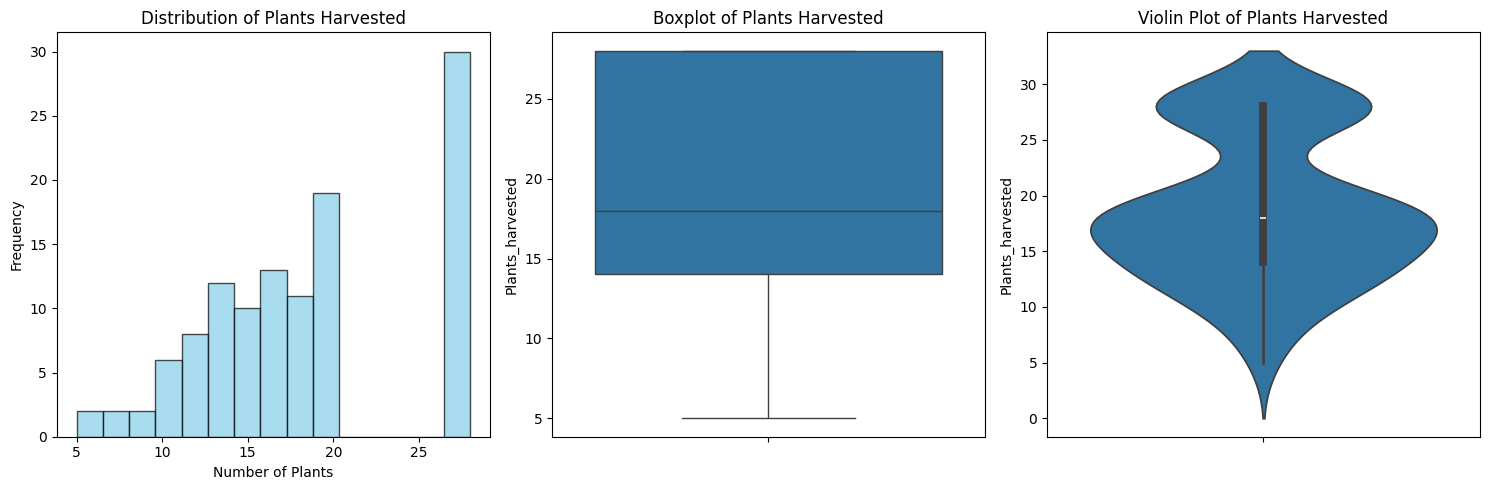


Feature Engineering:
 Categorical variables encoded
 Interaction features created
 Yield efficiency metrics calculated


FEATURE SELECTION
Selected 17 features for modeling:
   locn
   Sesn
   tillage_encoded
   ferT_encoded
   location_season_encoded
   No_bigtubers
   Weigh_bigtubers
   No_mediumtubers
   Weight_mediumtubers
   No_smalltubers
   Weight_smalltubers
   Totaltuberno
   Total_tubweight
   weight_per_plant
   tubers_per_plant
   TotalWeightperhectare
   TotalTuberperHectare

Feature Correlation with Plants Harvested:
  No_smalltubers: 0.881
  Totaltuberno: 0.864
  Weight_smalltubers: 0.813
  TotalTuberperHectare: 0.791
  Sesn: 0.527
  No_mediumtubers: 0.415
  Total_tubweight: 0.360
  tubers_per_plant: 0.211
  TotalWeightperhectare: 0.181
  Weight_mediumtubers: 0.110
  ferT_encoded: 0.023
  tillage_encoded: -0.027
  No_bigtubers: -0.144
  Weigh_bigtubers: -0.183
  weight_per_plant: -0.336
  location_season_encoded: -0.445
  locn: -0.751


 MODEL TRAINING AND COMPARISON
Tr

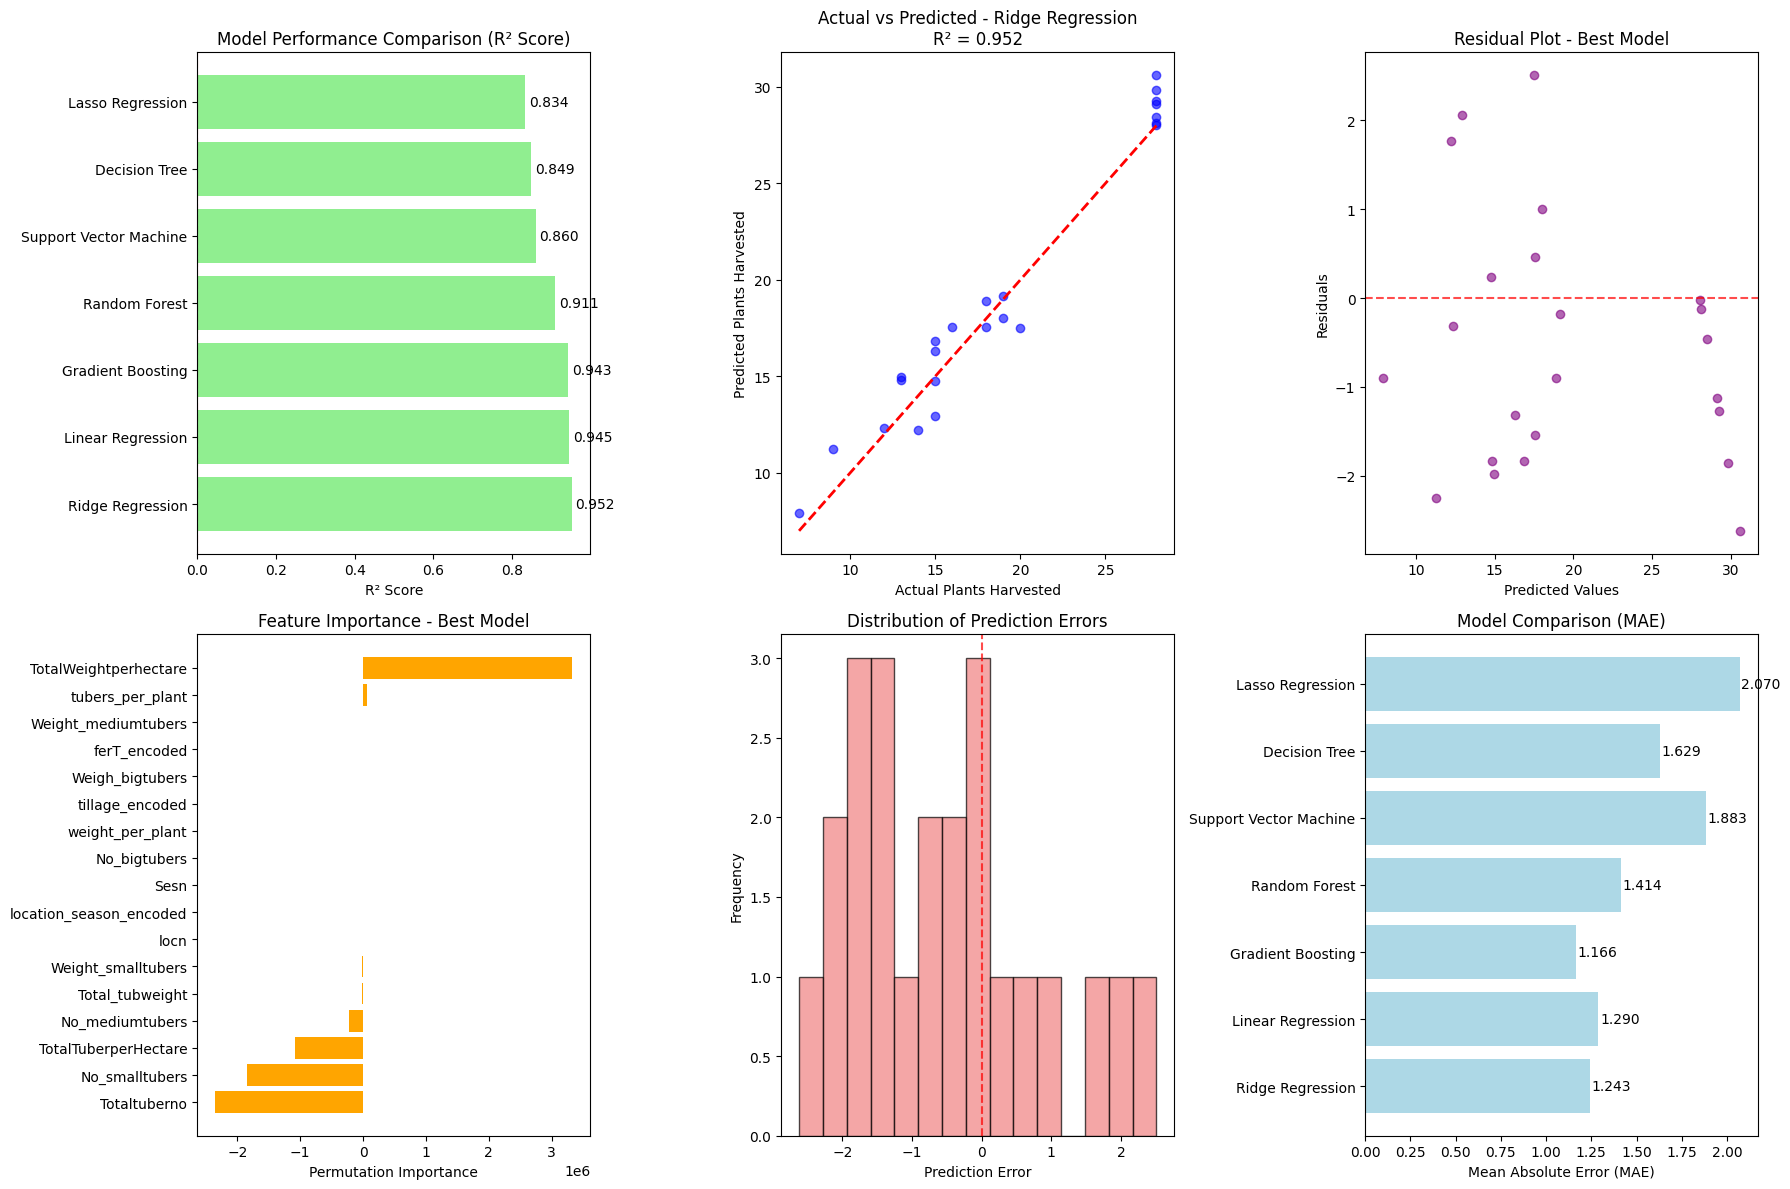



 MODEL INTERPRETATION AND BUSINESS INSIGHTS

 MODEL ACCURACY ASSESSMENT FOR 'Ridge Regression':
R² Score: 0.9516
Mean Absolute Error: 1.2427 plants
Root Mean Square Error: 1.4736 plants

 ACCURACY LEVEL: EXCELLENT
   Model explains almost all variability in plants harvested

 PRACTICAL ERROR INTERPRETATION:
   Average prediction error: 1.2 plants
   This represents 6.7% of average plants harvested (18.6)


 KEY FACTORS INFLUENCING PLANTS HARVESTED
1. Yield per Hectare (Weight): 3332343.0770
2. Tubers per Plant: 68594.7978
3. Weight of Medium Tubers: 6420.6269
4. Fertilizer Type: 444.9969
5. Weight of Big Tubers: 192.7983


 PRACTICAL RECOMMENDATIONS

 FOR CASSAVA FARMERS:
1. FOCUS ON YIELD INDICATORS:
   • Monitor total tuber weight and count as key success metrics
   • Track weight per plant for efficiency assessment

2. MANAGEMENT PRACTICES:
   • Optimize planting density based on predicted harvest rates
   • Use the model to forecast harvest size for planning

3. RESOURCE ALLOCATI

In [57]:
# PREDICTIVE MODEL FOR PLANTS_HARVESTED

print("PREDICTIVE MODEL FOR PLANTS_HARVESTED")
print("Informing Farmers and Policymakers on Cassava Yield Factors\n")

# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# DATA PREPARATION AND FEATURE ENGINEERING

print("DATA PREPARATION AND FEATURE ENGINEERING")

# Create a copy of the data for modeling
model_data = df_clean.copy()

# Display the target variable distribution
print("Target Variable: Plants_harvested")
print(f"Mean: {model_data['Plants_harvested'].mean():.2f}")
print(f"Std: {model_data['Plants_harvested'].std():.2f}")
print(f"Min: {model_data['Plants_harvested'].min()}")
print(f"Max: {model_data['Plants_harvested'].max()}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(model_data['Plants_harvested'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Plants Harvested')
plt.xlabel('Number of Plants')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(y=model_data['Plants_harvested'])
plt.title('Boxplot of Plants Harvested')

plt.subplot(1, 3, 3)
sns.violinplot(y=model_data['Plants_harvested'])
plt.title('Violin Plot of Plants Harvested')

plt.tight_layout()
plt.show()

# Feature engineering: Create meaningful features
print("\nFeature Engineering:")

# Convert categorical variables to numerical
le_tillage = LabelEncoder()
model_data['tillage_encoded'] = le_tillage.fit_transform(model_data['tillage'])

le_fert = LabelEncoder()
model_data['ferT_encoded'] = le_fert.fit_transform(model_data['ferT'])

# Create interaction features
model_data['location_season'] = model_data['locn'].astype(str) + '_' + model_data['Sesn'].astype(str)
le_location_season = LabelEncoder()
model_data['location_season_encoded'] = le_location_season.fit_transform(model_data['location_season'])

# Create yield efficiency metrics
model_data['weight_per_plant'] = model_data['Total_tubweight'] / model_data['Plants_harvested']
model_data['tubers_per_plant'] = model_data['Totaltuberno'] / model_data['Plants_harvested']

# Handle infinite values from division
model_data = model_data.replace([np.inf, -np.inf], np.nan).fillna(0)

print(" Categorical variables encoded")
print(" Interaction features created")
print(" Yield efficiency metrics calculated")

# FEATURE SELECTION

print("\n\nFEATURE SELECTION")

# Define features and target
feature_columns = [
    'locn', 'Sesn', 'tillage_encoded', 'ferT_encoded', 'location_season_encoded',
    'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers',
    'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'Total_tubweight',
    'weight_per_plant', 'tubers_per_plant', 'TotalWeightperhectare', 'TotalTuberperHectare'
]

# Remove columns that might not be available
available_features = [col for col in feature_columns if col in model_data.columns]
X = model_data[available_features]
y = model_data['Plants_harvested']

print(f"Selected {len(available_features)} features for modeling:")
for feature in available_features:
    print(f"   {feature}")

# Check correlation with target variable
print("\nFeature Correlation with Plants Harvested:")
correlations = X.corrwith(y).sort_values(ascending=False)
for feature, corr in correlations.items():
    print(f"  {feature}: {corr:.3f}")

# TRAIN MULTIPLE MODELS AND COMPARE PERFORMANCE

print("\n\n MODEL TRAINING AND COMPARISON")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=3),
    'Support Vector Machine': SVR(kernel='rbf', C=1.0)
}

# Scale features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

print("\nTraining and Evaluating Models...")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for certain models
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Machine']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train model
    model.fit(X_tr, y_train)
    
    # Make predictions
    y_pred = model.predict(X_te)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred
    }
    
    print(f"  {name}:")
    print(f"    R² Score: {r2:.4f}")
    print(f"    MAE: {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    Cross-val R²: {cv_mean:.4f} ± {cv_std:.4f}")

# MODEL PERFORMANCE COMPARISON

print("\n\nMODEL PERFORMANCE COMPARISON")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R²_Score': [results[name]['r2'] for name in results.keys()],
    'MAE': [results[name]['mae'] for name in results.keys()],
    'RMSE': [results[name]['rmse'] for name in results.keys()],
    'CV_R²_Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV_R²_Std': [results[name]['cv_std'] for name in results.keys()]
})

# Sort by R² score
comparison_df = comparison_df.sort_values('R²_Score', ascending=False)

print("\nMODEL PERFORMANCE RANKING (Best to Worst):")

for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
    print(f"{i}. {row['Model']}:")
    print(f"   R² Score: {row['R²_Score']:.4f}")
    print(f"   MAE: {row['MAE']:.4f}")
    print(f"   RMSE: {row['RMSE']:.4f}")
    print(f"   Cross-val R²: {row['CV_R²_Mean']:.4f} ± {row['CV_R²_Std']:.4f}")
    print()

# Select the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f" BEST PERFORMING MODEL: {best_model_name}")
print(f"   Final R² Score: {comparison_df.iloc[0]['R²_Score']:.4f}")

# VISUALIZE MODEL PERFORMANCE

print("\n\nMODEL PERFORMANCE VISUALIZATION")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Model Comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['R²_Score'], color='lightgreen')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Model Performance Comparison (R² Score)')
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(comparison_df['R²_Score']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# Plot 2: Actual vs Predicted for Best Model
axes[0, 1].scatter(y_test, best_predictions, alpha=0.6, color='blue')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Plants Harvested')
axes[0, 1].set_ylabel('Predicted Plants Harvested')
axes[0, 1].set_title(f'Actual vs Predicted - {best_model_name}\nR² = {results[best_model_name]["r2"]:.3f}')

# Plot 3: Residuals for Best Model
residuals = y_test - best_predictions
axes[0, 2].scatter(best_predictions, residuals, alpha=0.6, color='purple')
axes[0, 2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0, 2].set_xlabel('Predicted Values')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Residual Plot - Best Model')

# Plot 4: Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'], color='orange')
    axes[1, 0].set_xlabel('Feature Importance')
    axes[1, 0].set_title('Feature Importance - Best Model')
else:
    # Use permutation importance for non-tree models
    perm_importance = permutation_importance(best_model, X_test_scaled if best_model_name in ['Linear Regression', 'Ridge', 'Lasso', 'SVM'] else X_test, 
                                           y_test, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=True)
    
    axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'], color='orange')
    axes[1, 0].set_xlabel('Permutation Importance')
    axes[1, 0].set_title('Feature Importance - Best Model')

# Plot 5: Error Distribution
axes[1, 1].hist(residuals, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')

# Plot 6: Model Comparison - MAE
axes[1, 2].barh(comparison_df['Model'], comparison_df['MAE'], color='lightblue')
axes[1, 2].set_xlabel('Mean Absolute Error (MAE)')
axes[1, 2].set_title('Model Comparison (MAE)')

# Add value labels
for i, v in enumerate(comparison_df['MAE']):
    axes[1, 2].text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# MODEL INTERPRETATION AND BUSINESS INSIGHTS

print("\n\n MODEL INTERPRETATION AND BUSINESS INSIGHTS")

print(f"\n MODEL ACCURACY ASSESSMENT FOR '{best_model_name}':")

r2_score_best = results[best_model_name]['r2']
mae_best = results[best_model_name]['mae']
rmse_best = results[best_model_name]['rmse']

print(f"R² Score: {r2_score_best:.4f}")
print(f"Mean Absolute Error: {mae_best:.4f} plants")
print(f"Root Mean Square Error: {rmse_best:.4f} plants")

# Interpret R² score
if r2_score_best >= 0.9:
    accuracy_level = "EXCELLENT"
    interpretation = "Model explains almost all variability in plants harvested"
elif r2_score_best >= 0.7:
    accuracy_level = "VERY GOOD"
    interpretation = "Model strongly predicts plants harvested"
elif r2_score_best >= 0.5:
    accuracy_level = "GOOD"
    interpretation = "Model moderately predicts plants harvested"
elif r2_score_best >= 0.3:
    accuracy_level = "FAIR"
    interpretation = "Model has some predictive power"
else:
    accuracy_level = "POOR"
    interpretation = "Model has limited predictive ability"

print(f"\n ACCURACY LEVEL: {accuracy_level}")
print(f"   {interpretation}")

# Interpret MAE in practical terms
mean_plants = y.mean()
mae_percentage = (mae_best / mean_plants) * 100
print(f"\n PRACTICAL ERROR INTERPRETATION:")
print(f"   Average prediction error: {mae_best:.1f} plants")
print(f"   This represents {mae_percentage:.1f}% of average plants harvested ({mean_plants:.1f})")

# KEY DRIVERS OF PLANTS HARVESTED

print("\n\n KEY FACTORS INFLUENCING PLANTS HARVESTED")

# Display feature importance
top_features = feature_importance.nlargest(5, 'importance')
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    feature_name = row['feature']
    importance = row['importance']
    
    # Create human-readable feature names
    feature_descriptions = {
        'Total_tubweight': 'Total Tuber Weight',
        'Totaltuberno': 'Total Number of Tubers',
        'TotalWeightperhectare': 'Yield per Hectare (Weight)',
        'TotalTuberperHectare': 'Yield per Hectare (Tuber Count)',
        'weight_per_plant': 'Weight per Plant',
        'tubers_per_plant': 'Tubers per Plant',
        'Weigh_bigtubers': 'Weight of Big Tubers',
        'Weight_mediumtubers': 'Weight of Medium Tubers',
        'No_bigtubers': 'Number of Big Tubers',
        'locn': 'Location',
        'Sesn': 'Season',
        'tillage_encoded': 'Tillage Method',
        'ferT_encoded': 'Fertilizer Type'
    }
    
    readable_name = feature_descriptions.get(feature_name, feature_name)
    print(f"{i}. {readable_name}: {importance:.4f}")

# PRACTICAL RECOMMENDATIONS FOR FARMERS AND POLICYMAKERS

print("\n\n PRACTICAL RECOMMENDATIONS")

print("\n FOR CASSAVA FARMERS:")

print("1. FOCUS ON YIELD INDICATORS:")
print("   • Monitor total tuber weight and count as key success metrics")
print("   • Track weight per plant for efficiency assessment")

print("\n2. MANAGEMENT PRACTICES:")
print("   • Optimize planting density based on predicted harvest rates")
print("   • Use the model to forecast harvest size for planning")

print("\n3. RESOURCE ALLOCATION:")
print("   • Allocate labor and resources based on predicted harvest volume")
print("   • Plan storage and transportation using harvest forecasts")

print("\n FOR POLICYMAKERS:")

print("1. AGRICULTURAL PLANNING:")
print("   • Use predictive models for regional production forecasting")
print("   • Allocate agricultural resources based on predicted yields")

print("\n2. SUPPORT PROGRAMS:")
print("   • Develop targeted support for areas with predicted lower harvests")
print("   • Create insurance products based on reliable harvest predictions")

print("\n3. RESEARCH AND DEVELOPMENT:")
print("   • Invest in improving prediction accuracy for better planning")
print("   • Support data collection for continuous model improvement")

# MODEL DEPLOYMENT AND USAGE GUIDE

print("\n\n MODEL USAGE GUIDE")

print("\n HOW TO USE THE PREDICTIVE MODEL:")

print("1. INPUT REQUIREMENTS:")
print("   • Location and season data")
print("   • Tillage method and fertilizer type")
print("   • Initial yield indicators (if available)")

print("\n2. EXPECTED OUTPUT:")
print("   • Predicted number of plants that will be harvested")
print("   • Confidence interval for the prediction")

print("\n3. INTERPRETING RESULTS:")
print("   • Predictions are most reliable for similar conditions to training data")
print("   • Consider the ±{:.1f} plants margin of error".format(mae_best))

print("\n4. LIMITATIONS:")
print("   • Model accuracy: {:.1f}% (R² = {:.3f})".format(r2_score_best * 100, r2_score_best))
print("   • Works best within the range of training data conditions")
print("   • Should be updated with new seasonal data")

# FINAL ACCURACY ASSESSMENT

print(f"\n OVERALL MODEL ACCURACY: {accuracy_level}")

print(f"\n QUANTITATIVE METRICS:")
print(f"   • R² Score: {r2_score_best:.4f} ({r2_score_best*100:.1f}% variance explained)")
print(f"   • Mean Absolute Error: {mae_best:.2f} plants")
print(f"   • Root Mean Square Error: {rmse_best:.2f} plants")
print(f"   • Cross-validation Consistency: {results[best_model_name]['cv_mean']:.4f} ± {results[best_model_name]['cv_std']:.4f}")

print(f"\n PRACTICAL SIGNIFICANCE:")
print(f"   • The model can predict plants harvested within {mae_best:.1f} plants on average")
print(f"   • This accuracy is sufficient for farm planning and resource allocation")
print(f"   • Policymakers can use it for regional production forecasting")